<a href="https://colab.research.google.com/github/ameyas1/RecommendationSystem/blob/master/Collaborative_Filter_rec_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
!wget http://files.grouplens.org/datasets/movielens/ml-latest-small.zip

--2020-07-14 05:07:44--  http://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip’

ml-latest-small.zip 100%[===================>] 955.28K  1.38MB/s    in 0.7s    

2020-07-14 05:07:45 (1.38 MB/s) - ‘ml-latest-small.zip’ saved [978202/978202]



In [3]:
# import zipfile
# with zipfile.ZipFile('ml-1m.zip', 'r') as zip_ref:
#     zip_ref.extractall()
import zipfile
with zipfile.ZipFile('ml-latest-small.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [4]:
import numpy as np 
import pandas as pd

In [5]:
# import pandas as pd
# df=pd.read_csv('ml-1m/ratings.dat',delimiter='::',header=None,names=['userId','movieId','rating','time'])
rating_df = pd.read_csv("/content/ml-latest-small/ratings.csv")
rating_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
movies_df = pd.read_csv("/content/ml-latest-small/movies.csv")
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
df = movies_df.merge(rating_df,on='movieId').drop(['timestamp'], axis=1)
df.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5


In [8]:
df["rating"] = df["rating"].values.astype(np.float32)

In [9]:
min_rating = min(df["rating"])
max_rating = max(df["rating"])
df['y'] = df["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

In [10]:
user_ids = df["userId"].unique().tolist()
movie_ids = df["movieId"].unique().tolist()

user_encode = {x: i for i, x in enumerate(user_ids)}
user_decode = {i: x for i, x in enumerate(user_ids)}

movie_encode = {x: i for i, x in enumerate(movie_ids)}
movie_decode = {i: x for i, x in enumerate(movie_ids)}

df["user"] = df["userId"].map(user_encode)
df["movie"] = df["movieId"].map(movie_encode)

In [11]:
df.head()

,movieId,title,genres,userId,rating,y,user,movie
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,0.777778,0,0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,0.777778,1,0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,0.888889,2,0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,0.444444,3,0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,0.888889,4,0


In [12]:
data=df.describe()
data

,movieId,userId,rating,y,user,movie
count,100836.000000,100836.000000,100836.000000,100836.000000,100836.000000,100836.000000
mean,19435.295718,326.127564,3.501557,0.667013,206.777798,3101.735561
std,35530.987199,182.618491,1.042575,0.231673,138.878471,2627.050983
min,1.000000,1.000000,0.500000,0.000000,0.000000,0.000000
25%,1199.000000,177.000000,3.000000,0.555556,106.000000,900.000000
50%,2991.000000,325.000000,3.500000,0.666667,185.000000,2252.000000
75%,8122.000000,477.000000,4.000000,0.777778,280.000000,5095.250000
max,193609.000000,610.000000,5.000000,1.000000,609.000000,9723.000000


In [13]:
cols=int(data['movie']['max'])+1
rows=int(data['user']['max'])+1

In [14]:
utility=np.full((rows,cols),0.0)

In [15]:
for ind in df.index:
  row=int(df['user'][ind])
  col=int(df['movie'][ind])
  utility[row][col]=df['y'][ind]

Adding **Noise**

In [16]:
noise_factor = 0.2
utility_noise = utility + noise_factor * np.random.normal(size=utility.shape)

In [17]:
utilityFrame=pd.DataFrame(utility)
utilityFrame

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9684,9685,9686,9687,9688,9689,9690,9691,9692,9693,9694,9695,9696,9697,9698,9699,9700,9701,9702,9703,9704,9705,9706,9707,9708,9709,9710,9711,9712,9713,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
0,0.777778,0.0,0.777778,0.0,0.0,0.777778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.777778,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.777778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.777778,0.777778,0.0,0.555556,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.888889,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.444444,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.888889,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
606,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
607,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
608,0.000000,0.0,0.0000

In [18]:
utilityFrame_noise=pd.DataFrame(utility_noise)

In [19]:
utilityFrame_noise.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9684,9685,9686,9687,9688,9689,9690,9691,9692,9693,9694,9695,9696,9697,9698,9699,9700,9701,9702,9703,9704,9705,9706,9707,9708,9709,9710,9711,9712,9713,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
0,0.764845,0.215868,0.818751,0.008914,-0.094249,0.801675,0.027398,-0.303731,-0.095892,0.059628,0.146258,-0.022599,-0.004550,0.073665,-0.013119,-0.387048,-0.158293,-0.074719,-0.261877,0.076878,0.112130,0.072929,-0.285043,-0.126136,-0.280513,-0.286605,-0.318830,0.305936,0.068629,0.005855,0.160808,-0.175255,-0.037392,0.202312,0.173049,0.029811,-0.390740,0.307025,0.148218,0.208907,...,0.145154,0.141180,-0.009371,-0.074232,-0.471624,0.328070,-0.067020,-0.074307,-0.049290,0.256927,-0.064240,-0.069165,0.212610,0.096024,0.286966,-0.009930,-0.030017,0.185192,0.043613,0.360805,0.045477,-0.193210,0.195375,0.250241,-0.075005,0.053572,-0.149594,0.078035,-0.182327,-0.212069,0.372477,-0.060492,-0.220029,0.291389,-0.284746,0.519483,-0.017662,-0.083474,-0.191136,0.265424
1,1.196204,-0.060575,-0.021126,0.109049,0.123516,-0.224766,-0.067828,-0.198520,0.019528,0.141972,0.286264,0.109737,-0.197763,-0.173239,0.028472,-0.410890,-0.103026,0.247725,-0.315795,-0.164376,0.715892,-0.078998,-0.095452,-0.071290,0.218246,-0.246129,-0.092348,-0.122806,-0.160671,-0.558689,-0.171793,0.330463,0.524735,0.660492,0.256710,0.743677,-0.254479,0.254449,0.095461,-0.039667,...,0.051331,0.162749,-0.238865,0.022568,0.086442,-0.029721,0.185440,-0.439607,0.214569,0.225977,-0.041324,-0.212536,-0.269432,-0.013532,0.087079,-0.097132,0.090049,-0.022584,-0.199403,-0.013417,-0.214369,0.310890,0.163318,-0.231036,0.019530,-0.040012,0.061948,-0.007069,0.187515,0.012986,-0.264348,-0.089439,-0.084568,0.116041,0.269711,-0.078094,0.173401,-0.158547,-0.278629,-0.006940
2,0.643054,-0.148899,0.119359,-0.214900,0.170392,-0.069276,-0.031351,0.101576,0.012947,0.025919,-0.067795,-0.126320,-0.054404,-0.000714,0.078021,-0.054371,0.008001,0.324886,-0.007918,-0.049546,-0.233075,0.093851,-0.013198,0.360621,0.136455,-0.150561,0.087493,-0.443330,0.253730,-0.270863,0.030535,-0.164380,-0.184777,-0.226133,0.072251,0.190161,-0.086159,-0.118586,0.196321,-0.050706,...,0.074658,-0.205147,0.332807,-0.076620,0.282694,-0.046836,0.199310,-0.116062,-0.056605,-0.008412,-0.214764,0.109376,0.153548,-0.355241,0.003419,-0.231101,-0.253897,0.198117,0.110390,0.222001,0.228861,0.106042,-0.087526,0.272213,-0.196206,-0.018093,0.061823,-0.193164,0.231240,-0.053612,-0.050258,0.124496,-0.276316,0.307418,-0.247351,0.216457,0.111209,-0.048942,0.010119,-0.053536
3,0.491431,0.097313,-0.064939,-0.014520,0.012388,0.178954,-0.414083,0.114848,-0.207684,0.058667,0.196403,-0.223048,0.465556,0.357832,0.054941,0.335977,-0.297911,0.001779,0.045921,0.070366,-0.060434,0.100536,-0.199760,-0.131082,-0.190429,0.237078,0.070421,-0.240317,-0.190553,0.296507,0.170947,-0.226806,0.033505,-0.110591,-0.085842,-0.026140,0.138634,-0.389353,0.192321,0.226750,...,-0.286884,-0.033103,0.018114,0.238485,0.192832,-0.023627,-0.057288,-0.071077,-0.298108,-0.077583,-0.041917,0.014439,0.235914,-0.102571,-0.239842,0.011761,0.037336,0.077967,0.224199,-0.107541,-0.292936,-0.051788,0.258360,0.086228,-0.020919,0.201071,-0.051693,0.286793,0.065898,-0.067361,-0.101476,-0.292581,-0.063766,-0.145903,0.095699,0.155590,-0.029206,0.420235,0.130155,0.357477
4,0.558429,0.039305,-0.349759,0.193565,-0.445009,0.168356,-0.047239,0.139776,-0.037299,0.008765,0.250048,-0.010697,0.118926,0.099982,-0.192550,-0.053610,0.057803,0.222719,0.181401,0.201017,-0.356701,0.179947,-0.172218,-0.070904,0.054005,-0.267675,-0.181768,-0.108471,0.238813,0.080723,-0.324393,-0.537994,-0.120344,-0.367616,0.043335,0.174421,0.101203,0.087369,-0.292342,-0.122018,...,0.241678,-0.107436,-0.298379,0.046775,-0.079136,-0.031178,-0.391814,-0.087155,-0.052475,-0.316374,0.250042,-0.080437,-0.241630,-0.002613,-0.033995,-0.247776,0.234153,0.004649,-0.025069,0.173158,-0.109519,0.029723,-0.222705,0.248449,0

In [20]:
utilityFrame_noise.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9684,9685,9686,9687,9688,9689,9690,9691,9692,9693,9694,9695,9696,9697,9698,9699,9700,9701,9702,9703,9704,9705,9706,9707,9708,9709,9710,9711,9712,9713,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
605,-0.394303,-0.187042,0.327413,-0.343219,-0.077839,0.067615,-0.234932,0.115311,-0.168334,0.045582,0.080343,-0.075403,-0.011018,-0.235571,-0.094634,-0.066806,-0.098422,-0.085703,0.087468,0.170934,-0.372271,-0.040800,0.191170,0.066501,0.224709,-0.205229,0.136378,0.192539,0.051393,-0.175721,0.038092,-0.079744,0.261566,-0.015460,-0.355328,0.083948,-0.019668,0.334901,0.260292,0.062022,...,0.113306,0.222667,0.015243,0.010932,0.126307,-0.201168,0.214732,0.073076,-0.126635,0.275685,-0.009454,0.014961,0.279562,0.007967,0.276266,0.052818,-0.113897,-0.231334,0.186901,0.202405,0.089682,-0.006411,-0.110426,-0.058400,0.135914,0.214703,0.131693,0.140205,-0.061562,-0.294512,0.097645,-0.088291,0.118515,-0.047508,-0.192401,-0.060292,-0.620702,0.112008,-0.383353,-0.133743
606,-0.164895,0.442920,-0.192033,0.010798,-0.290419,-0.072258,-0.203524,-0.091659,0.045617,0.195264,-0.240895,-0.221089,-0.045171,-0.185456,-0.370396,0.282710,-0.103777,-0.126319,0.293234,0.010881,0.247492,0.014913,0.378022,-0.283076,0.200345,-0.045667,-0.255544,-0.009477,0.178490,0.190755,-0.310114,-0.099134,0.191985,0.125700,-0.264066,-0.130748,-0.091946,-0.320949,-0.209278,0.279777,...,-0.015641,-0.212140,-0.046821,-0.015268,-0.154121,-0.471569,-0.081922,-0.044314,-0.179348,0.083068,0.136445,0.004065,0.303782,0.240059,0.025502,0.023950,0.169355,0.131803,-0.183726,-0.012205,0.086550,0.092538,-0.155205,0.251570,0.093262,-0.067547,0.147804,0.401417,-0.421548,-0.151415,0.037245,-0.120759,0.073926,0.071593,-0.178351,0.265206,-0.062421,-0.009171,-0.207717,-0.333115
607,0.703791,0.155247,-0.236031,0.004269,-0.311378,-0.433321,0.074307,0.147007,-0.107632,-0.008681,0.033768,0.244209,-0.065667,-0.559059,0.017688,0.471825,0.023748,0.119709,-0.087643,0.382742,-0.043381,-0.084348,0.065092,-0.039543,-0.475541,0.124903,0.021873,-0.429369,-0.025554,0.081505,-0.084759,-0.095458,-0.190640,0.027754,0.024807,0.304825,0.205175,0.278143,0.084732,-0.013189,...,-0.002893,0.174301,0.049314,-0.127254,-0.008363,0.145308,0.060669,0.006295,0.103636,-0.181777,-0.171175,0.243098,0.210602,-0.072465,-0.084763,-0.011458,0.024417,0.156543,-0.173528,-0.112537,0.065979,-0.342344,0.147885,0.157800,-0.738229,0.284718,0.117460,-0.009692,-0.300060,-0.381978,-0.150165,0.230043,-0.081905,-0.001015,0.504204,-0.167303,0.251163,0.213048,-0.129571,-0.026207
608,0.037249,-0.391061,-0.120897,-0.013796,0.036852,0.031924,0.062874,-0.121886,0.250009,0.033801,0.212781,-0.289645,-0.015415,0.076760,-0.295998,0.031610,-0.360212,0.242999,-0.057667,0.060234,0.334711,0.072860,-0.041014,-0.120178,0.105903,0.074536,0.033483,0.179789,-0.411381,0.162254,0.014037,0.348414,0.078204,0.011559,0.224824,0.142370,0.044090,-0.177975,0.078008,-0.319013,...,0.011040,-0.060330,-0.280683,0.205109,-0.010530,0.114487,-0.054110,0.144889,-0.105325,-0.043343,-0.286083,0.004282,-0.001008,0.186578,-0.051532,-0.490583,-0.489054,0.173957,-0.027905,0.213589,-0.272842,0.110053,-0.417141,-0.007695,-0.132548,0.001518,0.360279,-0.051192,0.267037,0.056287,-0.113932,-0.721616,-0.054609,-0.013835,-0.224632,0.425259,0.236823,0.156676,-0.054036,-0.041829
609,0.022468,-0.018117,0.100120,-0.081456,-0.059125,0.119411,0.215134,0.282373,0.004196,0.213496,-0.027686,0.013621,-0.126750,0.389316,-0.157800,0.010544,-0.114797,-0.145074,0.056480,0.258204,0.102129,0.016394,-0.018835,-0.012769,0.205846,-0.275653,0.034173,-0.088552,0.272667,0.274552,-0.081001,0.216255,-0.011353,0.318825,0.378585,-0.248758,-0.121611,0.245167,-0.145745,0.094890,...,-0.061760,0.110507,-0.212993,-0.109574,-0.013261,-0.021964,0.128856,-0.009283,-0.046040,0.004178,-0.000953,0.156800,-0.300712,-0.381863,-0.268414,-0.373496,-0.158300,0.108197,1.042721,0.231464,0.176325,0.259267,0.222717,-0.01753

In [21]:
# from sklearn.model_selection import train_test_split

In [22]:
# utilityFrame_noise=utilityFrame_noise.drop(df.index[0])
# utilityFrame_noise=utilityFrame_noise.drop([0],axis=1)
# X_train, X_test = train_test_split(utilityFrame_noise,test_size=0.1, random_state=42)

In [23]:
# X_test.shape
utilityFrame_noise.shape

(610, 9724)

In [24]:
from tensorflow.keras.callbacks import ModelCheckpoint
filepath="col_filter_recommend.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
# callbacks_list = [checkpoint]


In [25]:
lr_p = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='loss', factor=0.6, patience=3, verbose=0, mode='min', min_delta=0.000001, cooldown=0, min_lr=0)

#es = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=12, verbose=0, mode='min')

callbacks_list = [checkpoint, lr_p]#, es]

In [26]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

In [27]:
regularizer_encode=0.001
regularizer_decode=0.001
dropout=0.2 #9724

In [28]:
input_layer = x = tf.keras.layers.Input(shape=(utilityFrame_noise.shape[1]), name='UserRating')

In [29]:
x = tf.keras.layers.Dense(4096, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(regularizer_encode))(input_layer)
x = tf.keras.layers.Dropout(rate = dropout)(x)

In [30]:
x = tf.keras.layers.Dense(2048, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(regularizer_encode))(x)
x = tf.keras.layers.Dropout(rate = dropout)(x)

In [31]:
x = tf.keras.layers.Dense(4096, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(regularizer_decode))(x)
x = tf.keras.layers.Dropout(rate = dropout)(x)

In [32]:
output_layer = tf.keras.layers.Dense(utilityFrame_noise.shape[1], name='UserScore',activation='linear',kernel_regularizer=tf.keras.regularizers.l2(regularizer_decode))(x)

In [33]:
model = tf.keras.models.Model(input_layer, output_layer)

In [34]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
UserRating (InputLayer)      [(None, 9724)]            0         
_________________________________________________________________
dense (Dense)                (None, 4096)              39833600  
_________________________________________________________________
dropout (Dropout)            (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              8390656   
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 4096)              8392704   
_________________________________________________________________
dropout_2 (Dropout)          (None, 4096)              0     

In [35]:
model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.001), loss='mse', metrics=['mse'])

In [36]:
history = model.fit(x = utilityFrame_noise, y = utility, epochs=500, batch_size=64, verbose=2,callbacks=callbacks_list)

10/10 - 30s - loss: 0.0076 - mse: 0.0076 - lr: 2.1600e-04
Epoch 62/500

Epoch 00062: loss improved from 0.00762 to 0.00762, saving model to col_filter_recommend.hdf5
10/10 - 28s - loss: 0.0076 - mse: 0.0076 - lr: 2.1600e-04
Epoch 63/500

Epoch 00063: loss improved from 0.00762 to 0.00762, saving model to col_filter_recommend.hdf5
10/10 - 32s - loss: 0.0076 - mse: 0.0076 - lr: 2.1600e-04
Epoch 64/500

Epoch 00064: loss did not improve from 0.00762
10/10 - 1s - loss: 0.0076 - mse: 0.0076 - lr: 2.1600e-04
Epoch 65/500

Epoch 00065: loss improved from 0.00762 to 0.00761, saving model to col_filter_recommend.hdf5
10/10 - 23s - loss: 0.0076 - mse: 0.0076 - lr: 1.2960e-04
Epoch 66/500

Epoch 00066: loss improved from 0.00761 to 0.00761, saving model to col_filter_recommend.hdf5
10/10 - 32s - loss: 0.0076 - mse: 0.0076 - lr: 1.2960e-04
Epoch 67/500

Epoch 00067: loss improved from 0.00761 to 0.00761, saving model to col_filter_recommend.hdf5
10/10 - 28s - loss: 0.0076 - mse: 0.0076 - lr: 1.296

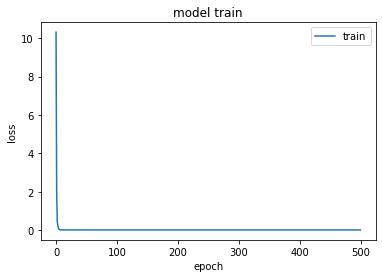

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline  
loss = history.history['loss']
# val_loss = history.history['val_loss']
plt.plot(loss)
# plt.plot(val_loss)
# plt.title('model train vs validation loss')
plt.title('model train')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='best')
plt.legend(['train'], loc='best')
plt.show()

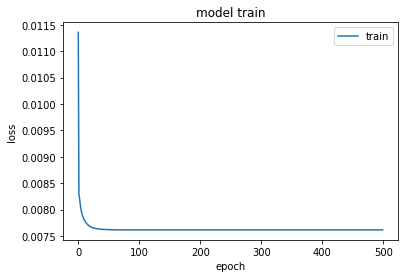

In [39]:
loss = history.history['mse']
# val_loss = history.history['val_mse']
plt.plot(loss)
# plt.plot(val_loss)
plt.title('model train')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='best')
plt.show()

In [40]:
model.load_weights("/content/col_filter_recommend.hdf5")

In [ ]:
# movies=pd.read_csv('ml-1m/movies.dat',delimiter='::',header=None,names=['movieId','movie','genre'])


In [44]:
# utilityFrame.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9684,9685,9686,9687,9688,9689,9690,9691,9692,9693,9694,9695,9696,9697,9698,9699,9700,9701,9702,9703,9704,9705,9706,9707,9708,9709,9710,9711,9712,9713,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
0,0.777778,0.0,0.777778,0.0,0.0,0.777778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.777778,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.777778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.777778,0.777778,0.0,0.555556,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# test=utilityFrame.iloc[[0]]

In [46]:
# test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9684,9685,9686,9687,9688,9689,9690,9691,9692,9693,9694,9695,9696,9697,9698,9699,9700,9701,9702,9703,9704,9705,9706,9707,9708,9709,9710,9711,9712,9713,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
0,0.777778,0.0,0.777778,0.0,0.0,0.777778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
# movies_watched_by_user = df[df.user == 0]

In [48]:
# movies_watched_by_user

,movieId,title,genres,userId,rating,y,user,movie
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,0.777778,0,0
325,3,Grumpier Old Men (1995),Comedy|Romance,1,4.0,0.777778,0,2
433,6,Heat (1995),Action|Crime|Thriller,1,4.0,0.777778,0,5
2107,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1,5.0,1.000000,0,43
2379,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1,5.0,1.000000,0,46
...,...,...,...,...,...,...,...,...
56816,3744,Shaft (2000),Action|Crime|Thriller,1,4.0,0.777778,0,2798
57276,3793,X-Men (2000),Action|Adventure|Sci-Fi,1,5.0,1.000000,0,2832
57457,3809,What About Bob? (1991),Comedy,1,4.0,0.777778,0,2843
59170,4006,Transformers: The Movie (1986),Adventure|Animation|Children|Sci-Fi,1,4.0,0.777778,0,2987


In [49]:
# movies_not_watched = df[
#     ~df["movieId"].isin(movies_watched_by_user.movieId.values)]

# movies_not_watched=movies_not_watched.drop_duplicates(subset='movieId', keep="last")

In [50]:
# movies_not_watched.head()

,movieId,title,genres,userId,rating,y,user,movie
324,2,Jumanji (1995),Adventure|Children|Fantasy,608,2.0,0.333333,212,1
383,4,Waiting to Exhale (1995),Comedy|Drama|Romance,600,1.5,0.222222,205,3
432,5,Father of the Bride Part II (1995),Comedy,604,3.0,0.555556,208,4
588,7,Sabrina (1995),Comedy|Romance,606,2.5,0.444444,210,6
596,8,Tom and Huck (1995),Adventure|Children,501,3.0,0.555556,247,7


In [51]:
# test=np.array(test)

In [52]:
# pred=model.predict(test)

In [53]:
# movie_not_watched_index = movies_not_watched.movie.values

In [54]:
# movie_not_watched_index

array([   1,    3,    4, ..., 9721, 9722, 9723])

In [57]:
# top_ratings_indices = pred[0].argsort()[::-1]

In [58]:
# top_ratings_indices

array([ 277,  314,  257, ..., 8067, 7326, 1124])

In [60]:
# user_df = pd.DataFrame(data={'movie':top_ratings_indices,'pred':pred[0][top_ratings_indices]})

In [61]:
# user_df = user_df.merge(df[['movie','title','genres']],on='movie')

In [62]:
# user_df = user_df.drop_duplicates(subset='movie', keep="last").reset_index()
# display(user_df.head())
# user_df.shape

,index,movie,pred,title,genres
0,316,277,0.408370,"Shawshank Redemption, The (1994)",Crime|Drama
1,645,314,0.404363,Forrest Gump (1994),Comedy|Drama|Romance|War
2,952,257,0.380897,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,1231,510,0.335727,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
4,1509,1938,0.330364,"Matrix, The (1999)",Action|Sci-Fi|Thriller


(9724, 5)

In [63]:
# user_df = user_df[user_df.movie.isin(movies_not_watched.movie)]
# user_df.head()

,index,movie,pred,title,genres
0,316,277,0.408370,"Shawshank Redemption, The (1994)",Crime|Drama
10,2897,507,0.255376,Terminator 2: Judgment Day (1991),Action|Sci-Fi
14,3719,659,0.246364,"Godfather, The (1972)",Crime|Drama
18,4520,123,0.236608,Apollo 13 (1995),Adventure|Drama|IMAX
20,4921,3633,0.230092,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy


In [ ]:
# user_df.shape

(9492, 5)

In [64]:
# movies_watched_by_user.sort_values(by="rating", ascending=False).head()

,movieId,title,genres,userId,rating,y,user,movie
65533,5060,M*A*S*H (a.k.a. MASH) (1970),Comedy|Drama|War,1,5.0,1.0,0,3668
48949,2872,Excalibur (1981),Adventure|Fantasy,1,5.0,1.0,0,2156
29325,1291,Indiana Jones and the Last Crusade (1989),Action|Adventure,1,5.0,1.0,0,989
29560,1298,Pink Floyd: The Wall (1982),Drama|Musical,1,5.0,1.0,0,995
49664,2948,From Russia with Love (1963),Action|Adventure|Thriller,1,5.0,1.0,0,2217


In [65]:
# user_df.sort_values(by="pred", ascending=False).head(10)

,index,movie,pred,title,genres
0,316,277,0.408370,"Shawshank Redemption, The (1994)",Crime|Drama
10,2897,507,0.255376,Terminator 2: Judgment Day (1991),Action|Sci-Fi
14,3719,659,0.246364,"Godfather, The (1972)",Crime|Drama
18,4520,123,0.236608,Apollo 13 (1995),Adventure|Drama|IMAX
20,4921,3633,0.230092,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy
22,5297,4131,0.221836,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy
23,5482,4791,0.221131,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy
26,6036,506,0.214665,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
28,6379,322,0.200483,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
30,6726,31,0.200302,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller


In [41]:
import random
def movie_recommendations(utilityFrame):

  user = random.randint(0, utilityFrame.shape[0] - 1)
  og_rating_user = utilityFrame.iloc[[user]]

  movies_watched_by_user = df[df.user == user]

  movies_not_watched = df[
    ~df["movieId"].isin(movies_watched_by_user.movieId.values)]

  movies_not_watched=movies_not_watched.drop_duplicates(subset='movieId', keep="last")

  og_rating_user = np.array(og_rating_user)

  movie_not_watched_index = movies_not_watched.movie.values

  pred=model.predict(og_rating_user)

  top_ratings_indices = pred[0].argsort()[::-1]

  user_df_rec = pd.DataFrame(data={'movie':top_ratings_indices,'pred':pred[0][top_ratings_indices]})

  user_df_rec = user_df_rec.merge(df[['movie','title','genres']],on='movie')

  user_df_rec = user_df_rec.drop_duplicates(subset='movie', keep="last").reset_index()

  user_df_rec = user_df_rec[user_df_rec.movie.isin(movies_not_watched.movie)]

  print("Showing recommendations from similar user: {} with userid: {}".format(user,user_encode.get(user)))
  print("====" * 9)

  print("Movies with high ratings from similar user")
  print("----" * 8)

  display(movies_watched_by_user.sort_values(by="rating", ascending=False).head(10))

  print("----" * 8)
  print("Top 10 movie recommendations")
  print("----" * 8)

  display(user_df_rec.sort_values(by="pred", ascending=False).head(10))






In [42]:
movie_recommendations(utilityFrame)

Showing recommendations from similar user: 565 with userid: 379
Movies with high ratings from similar user
--------------------------------


,movieId,title,genres,userId,rating,y,user,movie
91492,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,582,5.0,1.000000,565,7355
93475,89745,"Avengers, The (2012)",Action|Adventure|Sci-Fi|IMAX,582,5.0,1.000000,565,7675
91351,79091,Despicable Me (2010),Animation|Children|Comedy|Crime,582,5.0,1.000000,565,7354
93129,88125,Harry Potter and the Deathly Hallows: Part 2 (...,Action|Adventure|Drama|Fantasy|Mystery|IMAX,582,5.0,1.000000,565,7626
94102,92259,Intouchables (2011),Comedy|Drama,582,5.0,1.000000,565,7784
92094,81834,Harry Potter and the Deathly Hallows: Part 1 (...,Action|Adventure|Fantasy|IMAX,582,5.0,1.000000,565,7448
45276,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,582,5.0,1.000000,565,1938
96796,109487,Interstellar (2014),Sci-Fi|IMAX,582,4.5,0.888889,565,8358
89785,69844,Harry Potter and the Half-Blood Prince (2009),Adventure|Fantasy|Mystery|Romance|IMAX,582,4.5,0.888889,565,7061
93885,91529,"Dark Knight Rises, The (2012)",Action|Adventure|Crime|IMAX,582,4.5,0.888889,565,7750


--------------------------------
Top 10 movie recommendations
--------------------------------


,index,movie,pred,title,genres
0,316,277,0.378934,"Shawshank Redemption, The (1994)",Crime|Drama
1,645,314,0.373711,Forrest Gump (1994),Comedy|Drama|Romance|War
2,952,257,0.361879,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
6,1997,97,0.290929,Braveheart (1995),Action|Drama|War
8,2435,461,0.285547,Schindler's List (1993),Drama|War
10,2870,507,0.274014,Terminator 2: Judgment Day (1991),Action|Sci-Fi
11,3108,418,0.272456,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller
12,3312,46,0.268142,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
13,3512,899,0.262401,Raiders of the Lost Ark (Indiana Jones and the...,Action|Adventure
14,3727,0,0.260203,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
